# Importación de librerías

In [73]:
import pylab as py
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Lectura de datos

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
df = pd.read_csv("/content/drive/MyDrive/7 semestre/Reto1/Limpieza Datos/train.csv")
#df = pd.read_csv("train.csv")
df = df.drop("Id", axis=1)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Compresión de datos exhaustiva (general)

In [76]:
# Calcular la matriz de correlación
matriz_correlacion = df.corr()

umbral = 0.7

alto_umbral = []

for col in matriz_correlacion.columns:
    correlated_cols = matriz_correlacion.index[matriz_correlacion[col] >= umbral].tolist()
    correlated_cols.remove(col)
    for correlated_col in correlated_cols:
        pair = (col, correlated_col)
        alto_umbral.append(pair)

print(alto_umbral)

[('OverallQual', 'SalePrice'), ('YearBuilt', 'GarageYrBlt'), ('TotalBsmtSF', '1stFlrSF'), ('1stFlrSF', 'TotalBsmtSF'), ('GrLivArea', 'TotRmsAbvGrd'), ('GrLivArea', 'SalePrice'), ('TotRmsAbvGrd', 'GrLivArea'), ('GarageYrBlt', 'YearBuilt'), ('GarageCars', 'GarageArea'), ('GarageArea', 'GarageCars'), ('SalePrice', 'OverallQual'), ('SalePrice', 'GrLivArea')]


<ipython-input-76-be493a86c0cb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df.corr()


In [77]:
#analisis de una columna

column_of_interest = 'LotFrontage'

# Correlaciones entre la columna de interés y las demás columnas
correlations = df.corrwith(df[column_of_interest])

# Umbral para correlación alta (por ejemplo, 0.7)
threshold = 0.4

# Encontrar columnas con correlaciones altas con la columna de interés
high_corr_columns = correlations[correlations > threshold]

print("Columnas con correlación alta con", column_of_interest, ":", high_corr_columns)

Columnas con correlación alta con LotFrontage : LotFrontage    1.000000
LotArea        0.426095
1stFlrSF       0.457181
GrLivArea      0.402797
dtype: float64


<ipython-input-77-4621519c3868>:6: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corrwith(df[column_of_interest])


In [78]:
# Conteo de las variables faltantes
df.isnull().sum()/df.shape[0]*100 #porcentaje

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 80, dtype: float64

# Eliminación de datos duplicados

In [79]:
# Se verifica si hay datos duplicados (no hay)
print('Total Duplicates: ', df.duplicated().sum())

Total Duplicates:  0


# Tramiento de datos faltantes (sustitución)


* Electrical
* GarageYrBlt
* MasVnrArea

In [80]:
# Tratamiento de Electrical con la clase modal
df["Electrical"] = df["Electrical"].fillna("SBrkr")

#Tratamiento de columna GarageYrBlt
#Cambiar NA por 0 y convertir la columna en entero
df['GarageYrBlt'] = df['GarageYrBlt'].replace('No', np.nan)
df['GarageYrBlt'] = df['GarageYrBlt'].astype(float)
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0).astype(int)

# Tratamiento de MasVnrArea con la mediana
df["MasVnrArea"] = df["MasVnrArea"].fillna(df["MasVnrArea"].median())

# Tratamiento de nan (no hay datos existentes)

* Alley
* MasVnrType
* BsmtQual
* BsmtCond
* BsmtExposure
* BsmtFinType1
* BsmtFinType2
* FireplaceQu
* GarageType
* GarageFinish
* GarageQual
* GarageCond
* PoolQC
* Fence
* MiscFeature

In [81]:
# Tratamiento de Alley (NA son No alley access)
df['Alley'] = df['Alley'].astype(str).str.strip().replace('nan', 'No')

# Tratamiento de MasVnrType (no tiene por lo tanto MasVnrArea los 0 están correctos)
df['MasVnrType'] = df['MasVnrType'].astype(str).str.strip().replace(['None', 'nan'], 'No')

# Se sustituyen las clases por la mediana del intervalo representado en BsmtQual
df['BsmtQual'] = df['BsmtQual'].apply(lambda a:100 if a == 'Ex' else a)
df['BsmtQual'] = df['BsmtQual'].apply(lambda a:95 if a == 'Gd' else a)
df['BsmtQual'] = df['BsmtQual'].apply(lambda a:85 if a == 'TA' else a)
df['BsmtQual'] = df['BsmtQual'].apply(lambda a:75 if a == 'Fa' else a)
df['BsmtQual'] = df['BsmtQual'].apply(lambda a:70 if a == 'Po' else a)
df["BsmtQual"] = df["BsmtQual"].fillna(0)
df['BsmtQual'] = df['BsmtQual']. astype(int) # Se transforma la columna de float a int

# Tratamiento de BsmtCond (NA es que no tiene un sótano)
df["BsmtCond"] = df["BsmtCond"].fillna("No")

# Tratamiento de BsmtExposure (NA es que no tiene un sótano)
df["BsmtExposure"] = df["BsmtExposure"].fillna("No")

# Tratamiento de BsmtFinType1 (NA es que no tiene un sótano)
df["BsmtFinType1"] = df["BsmtFinType1"].fillna("No")

# Tratamiento de BsmtFinType2 (NA es que no tiene un sótano)
df["BsmtFinType2"] = df["BsmtFinType2"].fillna("No")

#FireplaceQu
df['FireplaceQu'] = df['FireplaceQu'].astype(str).str.strip().replace('nan', 'No')

#GarageType
df['GarageType'] = df['GarageType'].astype(str).str.strip().replace('nan', 'No')

#GarageFinish
df['GarageFinish'] = df['GarageFinish'].astype(str).str.strip().replace('nan', 'No')

#GarageQual
df['GarageQual'] = df['GarageQual'].astype(str).str.strip().replace('nan', 'No')

#GarageCond
df['GarageCond'] = df['GarageCond'].astype(str).str.strip().replace('nan', 'No')

#PoolQC
df['PoolQC'] = df['PoolQC'].astype(str).str.strip().replace('nan', 'No')

#Fence
df['Fence'] = df['Fence'].astype(str).str.strip().replace('nan', 'No')

#MiscFeature
df['MiscFeature'] = df['MiscFeature'].astype(str).str.strip().replace('nan', 'No')


# Eliminar columnas

* LotFrontage

In [82]:
columnas_a_eliminar = ['LotFrontage']
#se elimina LotFrontage debido a que tiene muchos valores faltantes y no se busca que se vea afectado el dato por lo cual no se hace tratamiento del mismo

# Eliminar las columnas especificadas
df = df.drop(columnas_a_eliminar, axis=1)

# Supuesto de normalidad de la variable "precio"

Se le aplica un logaritmo a la variable Y para que esta cumpla con los supuestos de normalidad de la regresión lineal. Como se puede observar, esta variable tiene un sesgo positivo, por lo tanto, al aplicarle la transformación logarítmica se logra cumplir con este supuesto.

In [83]:
log_price = np.log(df["SalePrice"])

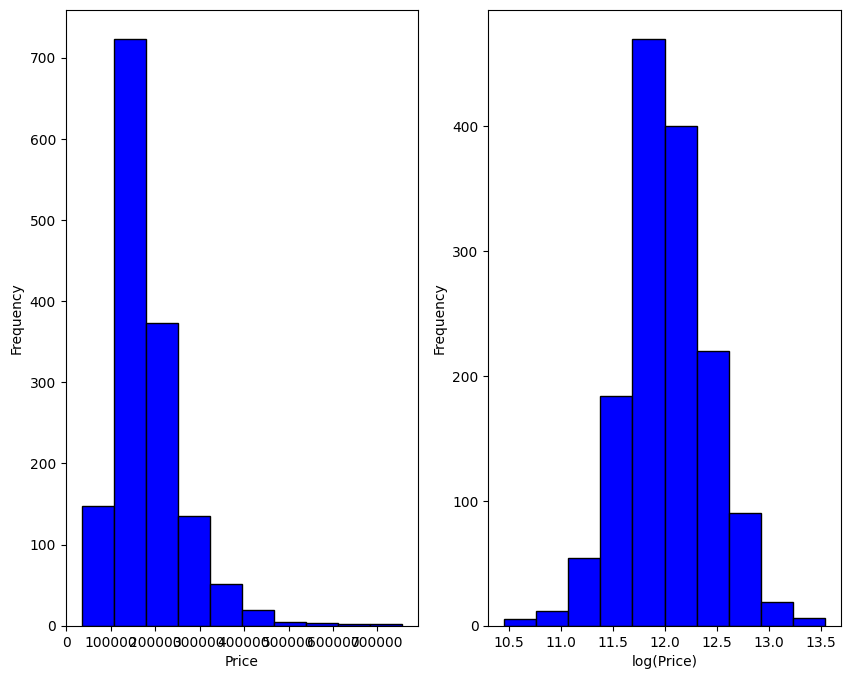

In [84]:
fig, ax = plt.subplots(1,2,figsize=(10,8))
ax[0].hist(df['SalePrice'],ec='black',color='b')
ax[1].hist(log_price,ec='black',color='b')
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Frequency')
ax[1].set_xlabel('log(Price)')
ax[1].set_ylabel('Frequency')
plt.show()

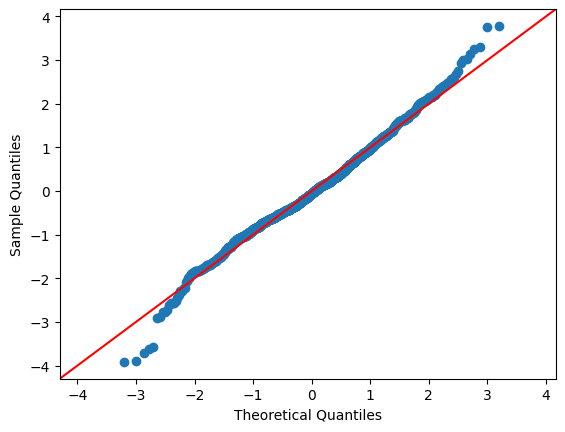

In [85]:
# Demostración del supuesto de normalidad con un QQ Plot
sm.qqplot((log_price-log_price.mean())/log_price.std(), line ='45')
py.show()

In [86]:
# Demostración del supuesto de normalidad con Jarque Bera
res = stats.jarque_bera(log_price)
print(res.statistic,res.pvalue)

#P value es menor a 0.05 así que no se rechaza la hipótesis
#nula lo cual quiere decir que ahora nuestra variable target tiene una distribución normal

42.76727358325192 5.166596416274182e-10


In [87]:
# Eliminación de variable Y del df y adición de la variable transformada
df = df.drop("SalePrice", axis=1)
df["SalePriceLog"] = log_price

# Opción 1: label encoding y hot encoding

## Label Encoding

Se le aplica a variables categóricas ordinales:

* Utilities
* ExterQual
* ExterCond
* BsmtCond
* BsmtExposure
* BsmtFinType1
* BsmtFinType2
* HeatingQC
* CentralAir
* KitchenQual

In [88]:
# Creación de dataframe para aplicación de label encoding
df_label = df.copy()

In [89]:
df_label["Utilities"] = df_label["Utilities"].replace({'AllPub': 4, 'NoSewr': 3,'NoSeWa': 2,'ELO': 1})
df_label["ExterQual"] = df_label["ExterQual"].replace({'Ex': 4, 'Gd': 3,'TA': 2,'Fa': 1,'Po': 0,})
df_label["ExterCond"] = df_label["ExterCond"].replace({'Ex': 4, 'Gd': 3,'TA': 2,'Fa': 1,'Po': 0,})
df_label["BsmtCond"] = df_label["BsmtCond"].replace({'Ex': 5, 'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'No': 0})
df_label["BsmtExposure"] = df_label["BsmtExposure"].replace({'Gd': 3, 'Av': 2,'Mn': 1,'No': 0})
df_label["BsmtFinType1"] = df_label["BsmtFinType1"].replace({'GLQ': 6, 'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1,'No': 0})
df_label["BsmtFinType2"] = df_label["BsmtFinType2"].replace({'GLQ': 6, 'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1,'No': 0})
df_label["HeatingQC"] = df_label["HeatingQC"].replace({'Ex': 4, 'Gd': 3,'TA': 2,'Fa': 1,'Po': 0})
df_label["CentralAir"] = df_label["CentralAir"].replace({'Y': 1, 'N': 0})
df_label["KitchenQual"] = df_label["KitchenQual"].replace({'Ex': 4, 'Gd': 3,'TA': 2,'Fa': 1,'Po': 0,})
df_label["FireplaceQu"] = df_label["FireplaceQu"].replace({'Ex': 5, 'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'No': 0})
df_label["GarageQual"] = df_label["GarageQual"].replace({'Ex': 5, 'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'No': 0})
df_label["GarageCond"] = df_label["GarageCond"].replace({'Ex': 5, 'Gd': 4,'TA': 3,'Fa': 2,'Po': 1,'No': 0})
df_label["PoolQC"] = df_label["PoolQC"].replace({'Ex': 4, 'Gd': 3,'TA': 2,'Fa': 1,'No': 0})

## Hot Encoding

Se le aplica a variables categóricas nominales

* MSZoning
* Street
* Alley
* LotShape
* LandContour
* LotConfig
* LandSlope
* Neighborhood
* Condition1
* Condition2
* BldgType
* HouseStyle
* RoofStyle
* RoofMatl
* Exterior1st
* Exterior2nd
* MasVnrType
* Foundation
* Heating
* Electrical
* Functional
* GarageType
* GarageFinish
* PavedDrive
* Fence
* MiscFeature
* SaleType
* SaleCondition

In [90]:
# Se aplica hot encoding a las variables nominales
categorical_cols = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical','Functional', 'GarageType', 'GarageFinish','PavedDrive','Fence','MiscFeature','SaleType','SaleCondition']
df_label = pd.get_dummies(df_label, columns=categorical_cols)

## Estandarización de los datos (label encoding/hot encoding)

In [91]:
labels = df_label.columns.tolist()
labels.remove('SalePriceLog')
df_label = df_label.drop("SalePriceLog", axis = 1)

In [92]:
variables_no_estandarizar = ['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_No', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_Artery', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Flat', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_ClyTile', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_AsbShng', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_No', 'MasVnrType_Stone', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'Heating_Floor', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'Electrical_FuseA', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr', 'Functional_Maj1', 'Functional_Maj2', 'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 'GarageType_2Types', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_No', 'GarageFinish_Fin', 'GarageFinish_No', 'GarageFinish_RFn', 'GarageFinish_Unf', 'PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y', 'Fence_GdPrv', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw', 'Fence_No', 'MiscFeature_Gar2', 'MiscFeature_No', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial']

scaler = StandardScaler()
columnas_a_estandarizar = [col for col in df_label.columns if col not in variables_no_estandarizar]
df_label[columnas_a_estandarizar] = scaler.fit_transform(df_label[columnas_a_estandarizar])
dflabelstand = pd.DataFrame(df_label)

dflabelstand["SalePriceLog"] = log_price

dflabelstand


,MSSubClass,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePriceLog
0,0.073375,-0.207142,0.02618,0.651479,-0.517200,1.050994,0.878668,0.514104,1.052302,-0.238112,...,0,0,1,0,0,0,0,1,0,12.247694
1,-0.872563,-0.091886,0.02618,-0.071836,2.179628,0.156734,-0.429577,-0.570750,-0.689604,-0.238112,...,0,0,1,0,0,0,0,1,0,12.109011
2,0.073375,0.073480,0.02618,0.651479,-0.517200,0.984752,0.830215,0.325915,1.052302,-0.238112,...,0,0,1,0,0,0,0,1,0,12.317167
3,0.309859,-0.096897,0.02618,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.689604,-0.238112,...,0,0,1,1,0,0,0,0,0,11.849398
4,0.073375,0.375148,0.02618,1.374795,-0.517200,0.951632,0.733308,1.366489,1.052302,-0.238112,...,0,0,1,0,0,0,0,1,0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.260560,0.02618,-0.071836,-0.517200,0.918511,0.733308,-0.570750,-0.689604,-0.238112,...,0,0,1,0,0,0,0,1,0,12.072541
1456,-0.872563,0.266407,0.02618,-0.071836,0.381743,0.222975,0.151865,0.087911,-0.689604,-0.238112,...,0,0,1,0,0,0,0,1,0,12.254863
1457,0.309859,-0.147810,0.02618,0.651479,3.078570,-1.002492,1.024029,-0.570750,2.794208,2.611429,...,0,0,1,0,0,0,0,1,0,12.493130
1458,-0.872563,-0.080160,0.02618,-0.795151,0.381743,-0.704406,0.539493,-0.570750,-0.689604,-0.238112,...,0,0,1,0,0,0,0,1,0,11.864462


## Correlación entre variables explicativas

In [93]:
dflabelstand.corr()

,MSSubClass,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePriceLog
MSSubClass,1.000000,-0.139781,0.022844,0.032628,-0.059316,0.027850,0.040581,0.023573,0.016178,-0.064686,...,-0.045156,-0.014555,0.026359,0.005003,0.016241,0.030002,0.000983,0.024359,-0.051068,-0.073959
LotArea,-0.139781,1.000000,-0.010123,0.105806,-0.005636,0.014228,0.013788,0.103321,0.055570,0.014732,...,0.020039,-0.005722,-0.002292,-0.029126,-0.013208,0.008966,-0.010781,0.005711,0.022635,0.257320
Utilities,0.022844,-0.010123,1.000000,0.001881,-0.009994,0.011505,0.034080,-0.063452,0.018054,0.006234,...,0.007905,0.001188,0.067078,-0.096033,0.001372,0.002383,0.003085,0.055982,0.008011,0.012632
OverallQual,0.032628,0.105806,0.001881,1.000000,-0.091932,0.572323,0.550684,0.407252,0.726278,0.013953,...,0.327412,-0.057962,-0.225013,-0.103535,-0.041677,-0.044950,-0.025515,-0.143282,0.323295,0.817184
OverallCond,-0.059316,-0.005636,-0.009994,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.138942,0.389163,...,-0.156175,-0.050663,0.163684,-0.046367,-0.038888,-0.033444,-0.023873,0.161642,-0.151659,-0.036868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_Alloca,0.030002,0.008966,0.002383,-0.044950,-0.033444,-0.010104,-0.020727,-0.013748,-0.049563,-0.000059,...,-0.027489,-0.004131,0.035530,-0.024817,-0.004772,1.000000,-0.010729,-0.194663,-0.027856,-0.024985
SaleCondition_Family,0.000983,-0.010781,0.003085,-0.025515,-0.023873,-0.035785,-0.048056,-0.009535,-0.050478,0.022311,...,-0.035587,-0.005348,0.028599,-0.032128,-0.006177,-0.010729,1.000000,-0.252006,-0.036062,-0.045567
SaleCondition_Normal,0.024359,0.005711,0.055982,-0.143282,0.161642,-0.158427,-0.120577,-0.081539,-0.184302,0.055405,...,-0.645698,-0.097031,0.634322,-0.582947,-0.112080,-0.194663,-0.252006,1.000000,-0.654323,-0.101838
SaleCondition_Partial,-0.051068,0.022635,0.008011,0.323295,-0.151659,0.343895,0.322837,0.162205,0.385961,-0.072861,...,0.986819,-0.013885,-0.769559,-0.083419,-0.016038,-0.027856,-0.036062,-0.654323,1.000000,0.324471


In [94]:
# Calcular la matriz de correlación
matriz_correlacion = dflabelstand.corr()

umbral = 0.85

alto_umbral = []

for col in matriz_correlacion.columns:
    correlated_cols = matriz_correlacion.index[matriz_correlacion[col] >= umbral].tolist()
    correlated_cols.remove(col)
    for correlated_col in correlated_cols:
        pair = (col, correlated_col)
        alto_umbral.append(pair)

print(alto_umbral)

[('Fireplaces', 'FireplaceQu'), ('FireplaceQu', 'Fireplaces'), ('GarageYrBlt', 'GarageQual'), ('GarageYrBlt', 'GarageCond'), ('GarageCars', 'GarageArea'), ('GarageArea', 'GarageCars'), ('GarageQual', 'GarageYrBlt'), ('GarageQual', 'GarageCond'), ('GarageCond', 'GarageYrBlt'), ('GarageCond', 'GarageQual'), ('PoolArea', 'PoolQC'), ('PoolQC', 'PoolArea'), ('MiscVal', 'MiscFeature_Gar2'), ('MSZoning_FV', 'Neighborhood_Somerst'), ('Neighborhood_Somerst', 'MSZoning_FV'), ('Exterior1st_CBlock', 'Exterior2nd_CBlock'), ('Exterior1st_CemntBd', 'Exterior2nd_CmentBd'), ('Exterior1st_HdBoard', 'Exterior2nd_HdBoard'), ('Exterior1st_MetalSd', 'Exterior2nd_MetalSd'), ('Exterior1st_VinylSd', 'Exterior2nd_VinylSd'), ('Exterior1st_Wd Sdng', 'Exterior2nd_Wd Sdng'), ('Exterior2nd_CBlock', 'Exterior1st_CBlock'), ('Exterior2nd_CmentBd', 'Exterior1st_CemntBd'), ('Exterior2nd_HdBoard', 'Exterior1st_HdBoard'), ('Exterior2nd_MetalSd', 'Exterior1st_MetalSd'), ('Exterior2nd_VinylSd', 'Exterior1st_VinylSd'), ('Exte

In [95]:
flat_umbral = []
for tup in alto_umbral:
    for item in tup:
        flat_umbral.append(item)

In [96]:
from collections import Counter
Counter(flat_umbral)

Counter({'Fireplaces': 2,
         'FireplaceQu': 2,
         'GarageYrBlt': 4,
         'GarageQual': 4,
         'GarageCond': 4,
         'GarageCars': 2,
         'GarageArea': 2,
         'PoolArea': 2,
         'PoolQC': 2,
         'MiscVal': 2,
         'MiscFeature_Gar2': 2,
         'MSZoning_FV': 2,
         'Neighborhood_Somerst': 2,
         'Exterior1st_CBlock': 2,
         'Exterior2nd_CBlock': 2,
         'Exterior1st_CemntBd': 2,
         'Exterior2nd_CmentBd': 2,
         'Exterior1st_HdBoard': 2,
         'Exterior2nd_HdBoard': 2,
         'Exterior1st_MetalSd': 2,
         'Exterior2nd_MetalSd': 2,
         'Exterior1st_VinylSd': 2,
         'Exterior2nd_VinylSd': 2,
         'Exterior1st_Wd Sdng': 2,
         'Exterior2nd_Wd Sdng': 2,
         'GarageType_No': 2,
         'GarageFinish_No': 2,
         'SaleType_New': 2,
         'SaleCondition_Partial': 2})

In [97]:
# VIF
"""for i in range(dflabelstand.shape[1]):
  print(dflabelstand.columns[i],variance_inflation_factor(dflabelstand,i))"""

'for i in range(dflabelstand.shape[1]):\n  print(dflabelstand.columns[i],variance_inflation_factor(dflabelstand,i))'

In [98]:
# Se eliminan por su alta correlación y VIF
dflabelstand = dflabelstand.drop(['FireplaceQu', 'GarageYrBlt', 'GarageCond', 'GarageArea', 'PoolArea', 'MiscFeature_Gar2',
                                  'Neighborhood_Somerst', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard',
                                  'Exterior2nd_MetalSd', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'GarageFinish_No',
                                  'SaleCondition_Partial'], axis=1)

In [99]:
print(len(dflabelstand.count()))

229


In [100]:
dflabelstand

,MSSubClass,LotArea,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SalePriceLog
0,0.073375,-0.207142,0.02618,0.651479,-0.517200,1.050994,0.878668,0.514104,1.052302,-0.238112,...,0,0,0,1,0,0,0,0,1,12.247694
1,-0.872563,-0.091886,0.02618,-0.071836,2.179628,0.156734,-0.429577,-0.570750,-0.689604,-0.238112,...,0,0,0,1,0,0,0,0,1,12.109011
2,0.073375,0.073480,0.02618,0.651479,-0.517200,0.984752,0.830215,0.325915,1.052302,-0.238112,...,0,0,0,1,0,0,0,0,1,12.317167
3,0.309859,-0.096897,0.02618,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.689604,-0.238112,...,0,0,0,1,1,0,0,0,0,11.849398
4,0.073375,0.375148,0.02618,1.374795,-0.517200,0.951632,0.733308,1.366489,1.052302,-0.238112,...,0,0,0,1,0,0,0,0,1,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.260560,0.02618,-0.071836,-0.517200,0.918511,0.733308,-0.570750,-0.689604,-0.238112,...,0,0,0,1,0,0,0,0,1,12.072541
1456,-0.872563,0.266407,0.02618,-0.071836,0.381743,0.222975,0.151865,0.087911,-0.689604,-0.238112,...,0,0,0,1,0,0,0,0,1,12.254863
1457,0.309859,-0.147810,0.02618,0.651479,3.078570,-1.002492,1.024029,-0.570750,2.794208,2.611429,...,0,0,0,1,0,0,0,0,1,12.493130
1458,-0.872563,-0.080160,0.02618,-0.795151,0.381743,-0.704406,0.539493,-0.570750,-0.689604,-0.238112,...,0,0,0,1,0,0,0,0,1,11.864462


## Regresión lineal  - Variables más significativas

In [101]:
X = dflabelstand.drop('SalePriceLog', axis=1)
Y = dflabelstand['SalePriceLog']

# Se comienza por las predicciones
X = sm.add_constant(X)

# Fit del modelo
model = sm.OLS(Y, X).fit()

significant_variables_list = [] #inicia lista

# While para realizar el backward selection
while True:
    # Obtiene los p-values para cada predictor
    p_values = model.pvalues[1:]  # Excluye la constante

    # Encuentra el predictor del p-value más grande
    max_p_value = p_values.max()

    # If para verificar si los valores más altos de p-value esta por arriba del nivel de significancia (0.05)
    if max_p_value > 0.05:
      # Se eliminan los predictores con el p-value más alto
      removed_variable = p_values.idxmax()
      X = X.drop(removed_variable, axis=1)
      model = sm.OLS(Y, X).fit()  # Fit del modelo después de remover la variable

    else:
      break # Si ya no hay variables a tirar se sale del while

significant_variables_list = X.columns.tolist()[1:]  # Excluir la constante y se guardan las variables significantes
significant_variables_list.append('SalePriceLog')

print(model.summary())
print("--------------------------------------")

# Contar las variables significativas (p-value <= 0.05)
significant_variables = (model.pvalues[1:] <= 0.05).sum()
print(f"Número de variables significativas en el modelo final: {significant_variables}")

                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     317.5
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        03:52:06   Log-Likelihood:                 1226.6
No. Observations:                1460   AIC:                            -2331.
Df Residuals:                    1399   BIC:                            -2009.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   11.5611 

In [102]:
print(significant_variables_list)

['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'GrLivArea', 'BsmtFullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'GarageCars', 'GarageQual', 'WoodDeckSF', 'ScreenPorch', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_Inside', 'LandSlope_Sev', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Condition1_Artery', 'Condition1_Feedr', 'Condition1_RRAe', 'Condition2_PosA', 'Condition2_PosN', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'RoofMatl_ClyTile', 'RoofMatl_CompShg', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_MetalSd', 'Exterior2nd_BrkFace', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_Wood', 'Heating_GasA', 'Heating_Grav', 'Electrical_SBrkr', 'Functional_Maj1', 'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 'Functional_Typ', 'GarageType_2Types', 'Sa

### Dataframe resultante del proceso de selección de variables

In [103]:
dflabelstand = dflabelstand[significant_variables_list]

In [104]:
dflabelstand

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtExposure,BsmtFinSF1,TotalBsmtSF,HeatingQC,CentralAir,...,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,GarageType_2Types,SaleType_COD,SaleType_ConLI,SaleType_WD,SaleCondition_Normal,SalePriceLog
0,-0.207142,0.651479,-0.517200,1.050994,0.878668,-0.631676,0.575425,-0.459303,0.891179,0.263813,...,0,0,0,1,0,0,0,1,1,12.247694
1,-0.091886,-0.071836,2.179628,0.156734,-0.429577,2.256363,1.171992,0.466465,0.891179,0.263813,...,0,0,0,1,0,0,0,1,1,12.109011
2,0.073480,0.651479,-0.517200,0.984752,0.830215,0.331004,0.092907,-0.313369,0.891179,0.263813,...,0,0,0,1,0,0,0,1,1,12.317167
3,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.631676,-0.499274,-0.687324,-0.151386,0.263813,...,0,0,0,1,0,0,0,1,0,11.849398
4,0.375148,1.374795,-0.517200,0.951632,0.733308,1.293683,0.463568,0.199680,0.891179,0.263813,...,0,0,0,1,0,0,0,1,1,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.631676,-0.973018,-0.238122,0.891179,0.263813,...,0,0,0,1,0,0,0,1,1,12.072541
1456,0.266407,-0.071836,0.381743,0.222975,0.151865,-0.631676,0.759659,1.104925,-1.193952,0.263813,...,1,0,0,0,0,0,0,1,1,12.254863
1457,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.631676,-0.369871,0.215641,0.891179,0.263813,...,0,0,0,1,0,0,0,1,1,12.493130
1458,-0.080160,-0.795151,0.381743,-0.704406,0.539493,0.331004,-0.865548,0.046905,-0.151386,0.263813,...,0,0,0,1,0,0,0,1,1,11.864462


In [106]:
# Guardar el DataFrame en un archivo CSV
path = "/content/drive/MyDrive/7 semestre/Reto1/Limpieza Datos/dflabelstand.csv"

dflabelstand.to_csv(path, index=False)

# Opción 2: hot encoding

In [107]:
# Creación de dataframe para aplicación de hot encoding
df_hot = df.copy()

In [108]:
# Para hacer una división de las columnas que son numéricas y categóricas, se hace desde el principio el select de las columnas
categoricas = df.select_dtypes(include='object').columns
numericas = df.select_dtypes(include='number').columns

In [109]:
# Transformación de datos con hot encoding
categoricas = list(categoricas)
df_hot = pd.get_dummies(df_hot, columns=categoricas)
df_hot = df_hot.drop("SalePriceLog", axis=1)

## Estandarización de los datos (hot encoding)

In [110]:
variables_no_estandarizar = ['MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
                             'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl',
                             'Alley_No', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2',
                             'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS',
                             'LandContour_Low', 'LandContour_Lvl', 'LotConfig_Corner',
                             'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl',
                             'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
                             'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
                             'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
                             'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
                             'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
                             'Neighborhood_Veenker', 'Condition1_Artery', 'Condition1_Feedr', 'Condition1_Norm', 'Condition1_PosA', 'Condition1_PosN',
                             'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Artery', 'Condition2_Feedr',
                             'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_1Fam',
                             'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Fin', 'HouseStyle_1.5Unf',
                             'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl',
                             'RoofStyle_Flat', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_ClyTile',
                             'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsbShng', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_AsbShng', 'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_ImStucc', 'Exterior2nd_MetalSd', 'Exterior2nd_Other', 'Exterior2nd_Plywood', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng', 'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_No', 'MasVnrType_Stone', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'Heating_Floor', 'Heating_GasA', 'Heating_GasW', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'Electrical_FuseA', 'Electrical_FuseF', 'Electrical_FuseP', 'Electrical_Mix', 'Electrical_SBrkr', 'Functional_Maj1', 'Functional_Maj2', 'Functional_Min1', 'Functional_Min2', 'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 'GarageType_2Types', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageType_No', 'GarageFinish_Fin', 'GarageFinish_No', 'GarageFinish_RFn', 'GarageFinish_Unf', 'PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y', 'Fence_GdPrv', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw', 'Fence_No', 'MiscFeature_Gar2', 'MiscFeature_No', 'MiscFeature_Othr', 'MiscFeature_Shed', 'MiscFeature_TenC', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial']

scaler = StandardScaler()
columnas_a_estandarizar = [col for col in df_hot.columns if col not in variables_no_estandarizar]
df_hot[columnas_a_estandarizar] = scaler.fit_transform(df_hot[columnas_a_estandarizar])
dfhotstand = pd.DataFrame(df_hot)

dfhotstand["SalePriceLog"] = log_price

dfhotstand

<ipython-input-110-e7f141d25761>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfhotstand["SalePriceLog"] = log_price


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,BsmtFinSF1,BsmtFinSF2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePriceLog
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.449386,0.575425,-0.288653,...,0,0,1,0,0,0,0,1,0,12.247694
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,0.449386,1.171992,-0.288653,...,0,0,1,0,0,0,0,1,0,12.109011
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.449386,0.092907,-0.288653,...,0,0,1,0,0,0,0,1,0,12.317167
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.200221,-0.499274,-0.288653,...,0,0,1,1,0,0,0,0,0,11.849398
4,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.449386,0.463568,-0.288653,...,0,0,1,0,0,0,0,1,0,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.570750,0.449386,-0.973018,-0.288653,...,0,0,1,0,0,0,0,1,0,12.072541
1456,-0.872563,0.266407,-0.071836,0.381743,0.222975,0.151865,0.087911,0.449386,0.759659,0.722112,...,0,0,1,0,0,0,0,1,0,12.254863
1457,0.309859,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.570750,-0.200221,-0.369871,-0.288653,...,0,0,1,0,0,0,0,1,0,12.493130
1458,-0.872563,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.570750,-0.200221,-0.865548,6.092188,...,0,0,1,0,0,0,0,1,0,11.864462


## Correlación entre variables explicativas

In [111]:
# Calcular la matriz de correlación
matriz_correlacion = dfhotstand.corr()

umbral = 0.85

alto_umbral = []

for col in matriz_correlacion.columns:
    correlated_cols = matriz_correlacion.index[matriz_correlacion[col] >= umbral].tolist()
    correlated_cols.remove(col)
    for correlated_col in correlated_cols:
        pair = (col, correlated_col)
        alto_umbral.append(pair)

print(alto_umbral)

[('GarageCars', 'GarageArea'), ('GarageArea', 'GarageCars'), ('MiscVal', 'MiscFeature_Gar2'), ('MSZoning_FV', 'Neighborhood_Somerst'), ('Neighborhood_Somerst', 'MSZoning_FV'), ('Exterior1st_CBlock', 'Exterior2nd_CBlock'), ('Exterior1st_CemntBd', 'Exterior2nd_CmentBd'), ('Exterior1st_HdBoard', 'Exterior2nd_HdBoard'), ('Exterior1st_MetalSd', 'Exterior2nd_MetalSd'), ('Exterior1st_VinylSd', 'Exterior2nd_VinylSd'), ('Exterior1st_Wd Sdng', 'Exterior2nd_Wd Sdng'), ('Exterior2nd_CBlock', 'Exterior1st_CBlock'), ('Exterior2nd_CmentBd', 'Exterior1st_CemntBd'), ('Exterior2nd_HdBoard', 'Exterior1st_HdBoard'), ('Exterior2nd_MetalSd', 'Exterior1st_MetalSd'), ('Exterior2nd_VinylSd', 'Exterior1st_VinylSd'), ('Exterior2nd_Wd Sdng', 'Exterior1st_Wd Sdng'), ('BsmtCond_No', 'BsmtFinType1_No'), ('BsmtCond_No', 'BsmtFinType2_No'), ('BsmtFinType1_No', 'BsmtCond_No'), ('BsmtFinType1_No', 'BsmtFinType2_No'), ('BsmtFinType2_No', 'BsmtCond_No'), ('BsmtFinType2_No', 'BsmtFinType1_No'), ('GarageType_No', 'GarageFin

In [112]:
flat_umbral = []
for tup in alto_umbral:
    for item in tup:
        flat_umbral.append(item)

In [113]:
from collections import Counter
Counter(flat_umbral)

Counter({'GarageCars': 2,
         'GarageArea': 2,
         'MiscVal': 2,
         'MiscFeature_Gar2': 2,
         'MSZoning_FV': 2,
         'Neighborhood_Somerst': 2,
         'Exterior1st_CBlock': 2,
         'Exterior2nd_CBlock': 2,
         'Exterior1st_CemntBd': 2,
         'Exterior2nd_CmentBd': 2,
         'Exterior1st_HdBoard': 2,
         'Exterior2nd_HdBoard': 2,
         'Exterior1st_MetalSd': 2,
         'Exterior2nd_MetalSd': 2,
         'Exterior1st_VinylSd': 2,
         'Exterior2nd_VinylSd': 2,
         'Exterior1st_Wd Sdng': 2,
         'Exterior2nd_Wd Sdng': 2,
         'BsmtCond_No': 4,
         'BsmtFinType1_No': 4,
         'BsmtFinType2_No': 4,
         'GarageType_No': 6,
         'GarageFinish_No': 6,
         'GarageQual_No': 6,
         'GarageCond_No': 6,
         'SaleType_New': 2,
         'SaleCondition_Partial': 2})

In [114]:
# VIF
"""for i in range(dfhotstand.shape[1]):
  print(dfhotstand.columns[i],variance_inflation_factor(dfhotstand,i))"""

'for i in range(dfhotstand.shape[1]):\n  print(dfhotstand.columns[i],variance_inflation_factor(dfhotstand,i))'

In [115]:
# Se eliminan por su alta correlación y VIF
dfhotstand = dfhotstand.drop(['Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd',
                              'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'GarageCars', 'SaleCondition_Partial', 'MiscFeature_Gar2',
                              'Neighborhood_Somerst', 'BsmtFinType1_No', 'BsmtFinType2_No',  'GarageFinish_No', 'GarageQual_No',
                              'GarageCond_No'], axis=1)

## Regresión lineal - Variables más significativas

In [116]:
X = dfhotstand.drop('SalePriceLog', axis=1)
Y = dfhotstand['SalePriceLog']

# Se comienza por las predicciones
X = sm.add_constant(X)

# Fit del modelo
model = sm.OLS(Y, X).fit()

significant_variables_list = [] #inicia lista

# While para realizar el backward selection
while True:
    # Obtiene los p-values para cada predictor
    p_values = model.pvalues[1:]  # Excluye la contante

    # Encuentra el predictor del p-value más grande
    max_p_value = p_values.max()

    # If para verificar si los valores más altos de p-value esta por arriba del nivel de significancia (0.05)
    if max_p_value > 0.05:
      # Se eliminan los predictores con el p-value más alto
      removed_variable = p_values.idxmax()
      X = X.drop(removed_variable, axis=1)
      model = sm.OLS(Y, X).fit()  # Fit del modelo después de remover la variable

    else:
      break # Si ya no hay variables a tirar se sale del while

significant_variables_list = X.columns.tolist()[1:]  # Excluir la constante y se guardan las variables significantes
significant_variables_list.append('SalePriceLog')

print(model.summary())
print("--------------------------------------")

# Contar las variables significativas (p-value <= 0.05)
significant_variables = (model.pvalues[1:] <= 0.05).sum()
print(f"Número de variables significativas en el modelo final: {significant_variables}")

                            OLS Regression Results                            
Dep. Variable:           SalePriceLog   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     215.7
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        04:33:36   Log-Likelihood:                 1285.9
No. Observations:                1460   AIC:                            -2382.
Df Residuals:                    1365   BIC:                            -1880.
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.0106 

In [117]:
print(significant_variables_list)

['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MSZoning_C (all)', 'MSZoning_RM', 'Street_Pave', 'LandContour_Bnk', 'LandContour_Low', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Sev', 'Neighborhood_BrDale', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Condition1_Artery', 'Condition1_Feedr', 'Condition1_RRAe', 'Condition2_Artery', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_2.5Fin', 'RoofStyle_Flat', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_

### Dataframe resultante del proceso de selección de variables

In [118]:
dfhotstand = dfhotstand[significant_variables_list]

In [119]:
dfhotstand

,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,GrLivArea,BsmtFullBath,KitchenAbvGr,...,GarageQual_Ex,GarageCond_Ex,GarageCond_Fa,PoolQC_No,Fence_GdWo,SaleType_COD,SaleType_ConLI,SaleType_WD,SaleCondition_Normal,SalePriceLog
0,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.575425,-0.459303,0.370333,1.107810,-0.211454,...,-0.045376,-0.037037,-0.156721,0.069409,0,0,0,1,1,12.247694
1,-0.091886,-0.071836,2.179628,0.156734,-0.429577,1.171992,0.466465,-0.482512,-0.819964,-0.211454,...,-0.045376,-0.037037,-0.156721,0.069409,0,0,0,1,1,12.109011
2,0.073480,0.651479,-0.517200,0.984752,0.830215,0.092907,-0.313369,0.515013,1.107810,-0.211454,...,-0.045376,-0.037037,-0.156721,0.069409,0,0,0,1,1,12.317167
3,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.499274,-0.687324,0.383659,1.107810,-0.211454,...,-0.045376,-0.037037,-0.156721,0.069409,0,0,0,1,0,11.849398
4,0.375148,1.374795,-0.517200,0.951632,0.733308,0.463568,0.199680,1.299326,1.107810,-0.211454,...,-0.045376,-0.037037,-0.156721,0.069409,0,0,0,1,1,12.429216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.973018,-0.238122,0.250402,-0.819964,-0.211454,...,-0.045376,-0.037037,-0.156721,0.069409,0,0,0,1,1,12.072541
1456,0.266407,-0.071836,0.381743,0.222975,0.151865,0.759659,1.104925,1.061367,1.107810,-0.211454,...,-0.045376,-0.037037,-0.156721,0.069409,0,0,0,1,1,12.254863
1457,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.369871,0.215641,1.569647,-0.819964,-0.211454,...,-0.045376,-0.037037,-0.156721,0.069409,0,0,0,1,1,12.493130
1458,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.865548,0.046905,-0.832788,1.107810,-0.211454,...,-0.045376,-0.037037,-0.156721,0.069409,0,0,0,1,1,11.864462


In [120]:
# Guardar el DataFrame en un archivo CSV
path = "/content/drive/MyDrive/7 semestre/Reto1/Limpieza Datos/dfhotstand.csv"

dfhotstand.to_csv(path, index=False)